<a href="https://colab.research.google.com/github/n-bzy/iannwtf/blob/n-bzy-homework02/homework02_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

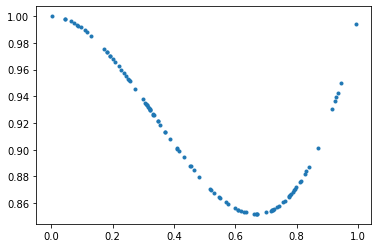

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in matmul


[0.1321076812492466, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931909966, 0.12838922931

<function matplotlib.pyplot.show(*args, **kw)>

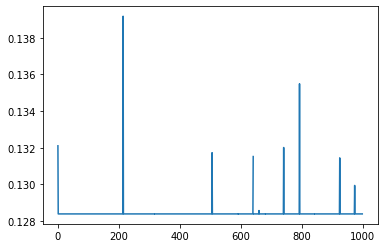

In [3]:
# -*- coding: utf-8 -*-
"""homework02.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1QQ-8jqDCLPIWSyJb5B5inVqaZKQxc66z
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import tensorflow as tf

class Layer:
  """Creates a layer of n perceptrons"""
  def __init__(self, n_units, input_units):
    """Constructor sets up the weights (random values), bias (zeros), 
    layer input, layer preactivation and layer activation"""
    self.bias = np.zeros((1,n_units))
    self.weights = np.random.default_rng().random((input_units,n_units))*2-1
    self.layer_input = None
    self.layer_preactivation = None
    self.layer_activation = None

  def forward_step(self, input):
    """Return each units activation using ReLu as activation function"""
    self.layer_input = np.append(input,[1],axis=0) # Add [1] at the end for calc of bias
    # link weights and bias in one matrix
    w_b = np.append(self.weights,self.bias,axis=0) 
    self.layer_preactivation = self.layer_input@w_b
    output = np.maximum(0,self.layer_preactivation) # ReLu activation function
    self.layer_activation = output
    return output
  
  def backward_step(self, input, l_a,gamma = 0.03):
    """Updates each units parameters (weigths and bias)"""
    # Derivative of ReLu = 1
    # Gradient w.r.t layers weights
    grad_l_w = input.transpose()@(np.maximum(0,1)*l_a)
    # Gradient w.r.t layers bias
    grad_l_b = (np.maximum(0,1)*l_a)                      
    # Gradient w.r.t layers input = output/activation of layer l-1
    grad_l_i = (np.maximum(0,1)*l_a)@self.weights.transpose()  
    # Updating of layers parameters with learning rate gamma
    self.weights = self.weights - gamma*grad_l_w
    self.bias = self.bias - gamma*grad_l_b
    return grad_l_i

class MLP:
  """Creates a Multi-Layer-Perceptron which combines instances of class Layer"""
  def __init__(self, n_layers, n_units, input_units):
    self.n_layers = n_layers
    self.n_units = n_units
    self.save = [] # Needed for activation later
    # Create a list of all layers with respective n units
    self.layers = []
    for n in range(n_layers):
      self.layers.append(Layer(n_units[n], input_units[n]))

  def forward_step(self, input):
    """Passes an input through the entire network and returns the output"""
    input = np.array(input)
    output = np.empty(input.shape) # Only works for output layer with 1 unit
    for n in range(self.n_layers):
      y = self.layers[n].forward_step(input)
      # Last layer = output
      if n == self.n_layers:
        output = y
      # Hidden layer = input for next layer
      else:
        input = y
    return output

  def backpropagation(self, l_d, input):
    """Updates all the weights and biases in the network given a loss l_d"""
    l_d = np.array([input])
    for n in range(self.n_layers-1, -1,-1):
      # First layer
      if n == 0:
        inp = np.array([input])
      # Every other layer
      else:
        inp = np.array([self.layers[n-1].layer_activation])
      back = self.layers[n].backward_step(inp, l_d)
      l_d = np.array(back)
      #print(self.layers[n].weights)

x = np.random.rand(100,1)
t = x**3-x**2+1
plt.plot(x, t, '.')
plt.show()
test = MLP(2, [10,1], [1, 10])
safeloss = []

# Training of MLP for n Epochs
epoch = 1000
for n in range(epoch):
  z = np.empty(x.size)
  for k in range(x.size):
    output = test.forward_step(x[k])
    loss = np.mean(1/2*(output - t[k])**2) # if array needed remove np.mean
    z[k] = loss
    l_d = np.subtract(output,t[k])
    test.backpropagation(l_d, x[k])
  y = np.mean(z)
  safeloss.append(y)
  #print(len(safeloss), np.mean(safeloss[n]), '.')
print(safeloss)
# Visualization: Epochs (x-axis) and average loss (y-axis)

plt.plot(range(epoch), safeloss)
plt.show
  